In [16]:
import json

In [17]:
def short_name(name):
    return "m="+name.split('I')[-1]
def kb_name(kb):
    return ' '.join([word.capitalize() for word in kb.split('_')])

In [22]:
def plot_acc_curves(plot_data, names, mode='hard', emb_model='ConEx'):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('NCES2$_{m=32}$', 'NCES2$_{m=64}$', 'NCES2$_{m=128}$')
    for ax, name, data in zip(axs.flat, names, plot_data):
        i = 0
        for crv in data[f'{mode} acc']:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(crv, mk, markersize=5, linewidth=4, color=c)
            i += 1
        ax.set_title(name, fontsize=30, fontweight="bold")
        ax.set_xlabel('$Epochs$', fontsize=30)
        ax.set_ylabel('$'+mode.capitalize()+'$'+' $Accuracy$', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=30)
    leg = fig.legend(legend, loc='upper center', prop={'size': 30}, bbox_to_anchor=(0.52, -0.05), fancybox=True, shadow=True, ncol=3)
    for line in leg.get_lines():
        line.set_linewidth(6.0)
    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'accuracy-curves-{mode}-nces2.pdf', bbox_inches='tight')
    fig.show()

In [23]:
emb_model = 'ConEx'

In [24]:
plot_data = [{'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer_inducing_points32", "SetTransformer_inducing_points64", "SetTransformer_inducing_points128"]:
        with open(f'datasets/{kb}/Plot_data/{emb_model}_{model}.json') as file:
            data = json.load(file)
            for mode in ['soft acc', 'hard acc']:
                plot_data[i][mode].append(data[mode])

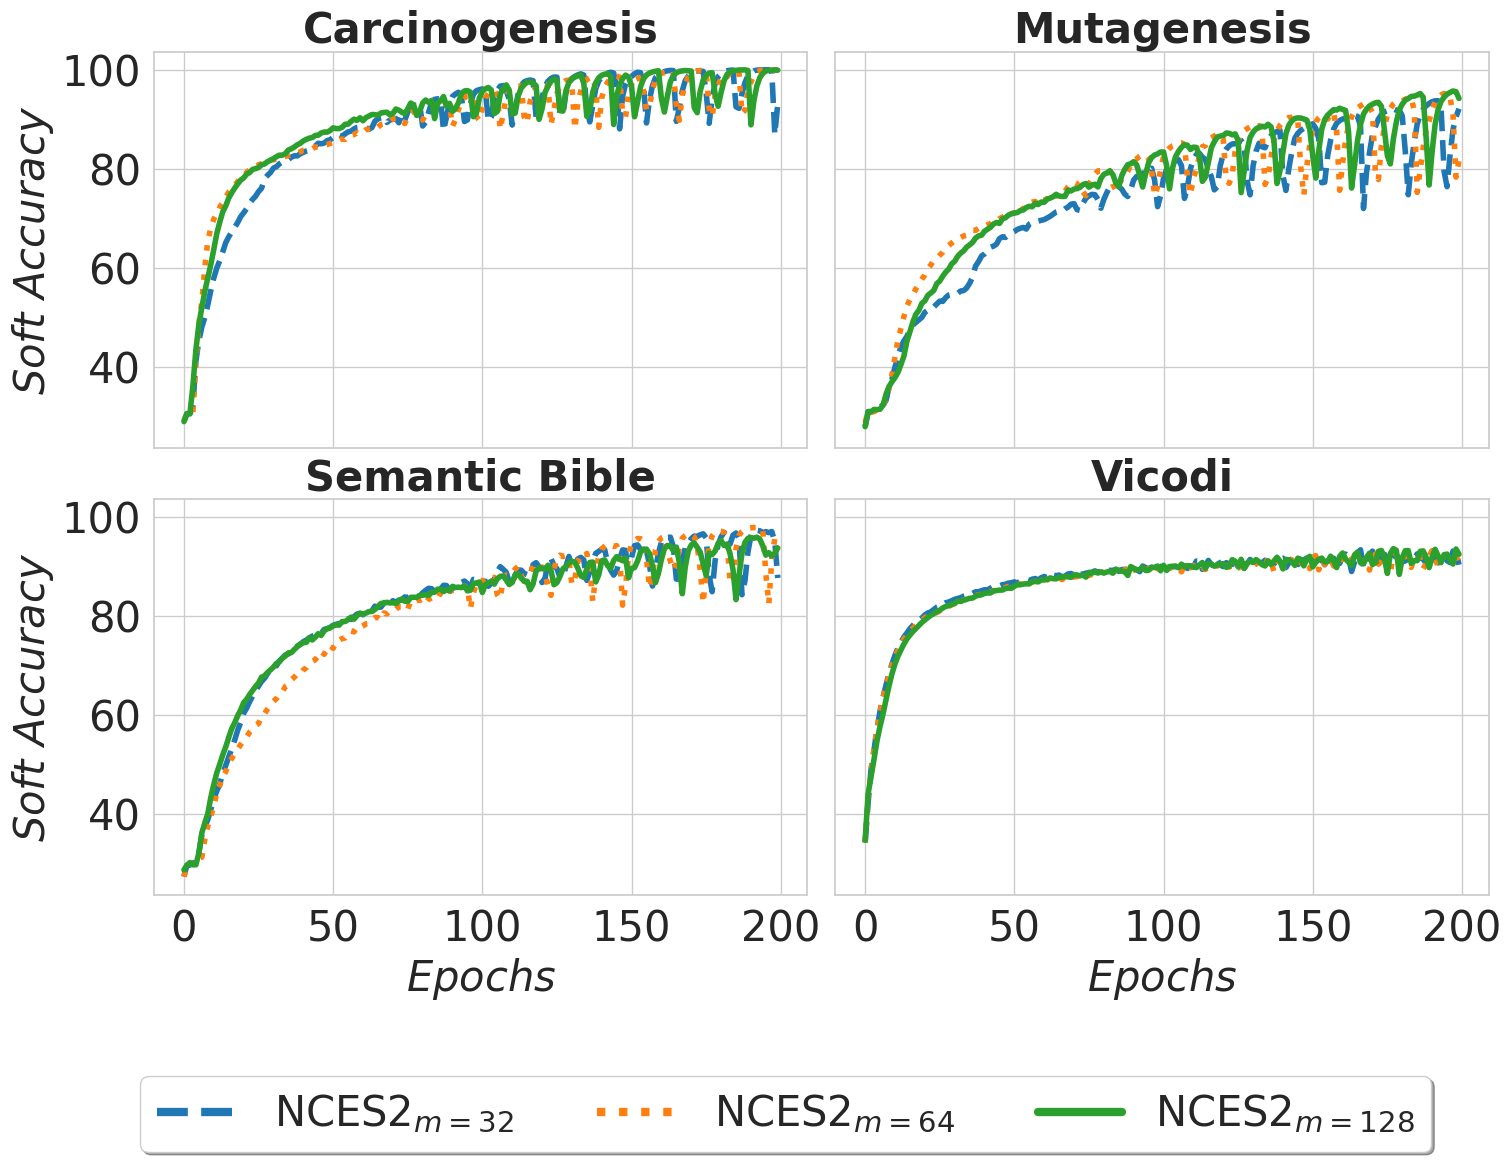

In [25]:
names = ['Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi']
plot_acc_curves(plot_data, names, mode='soft')

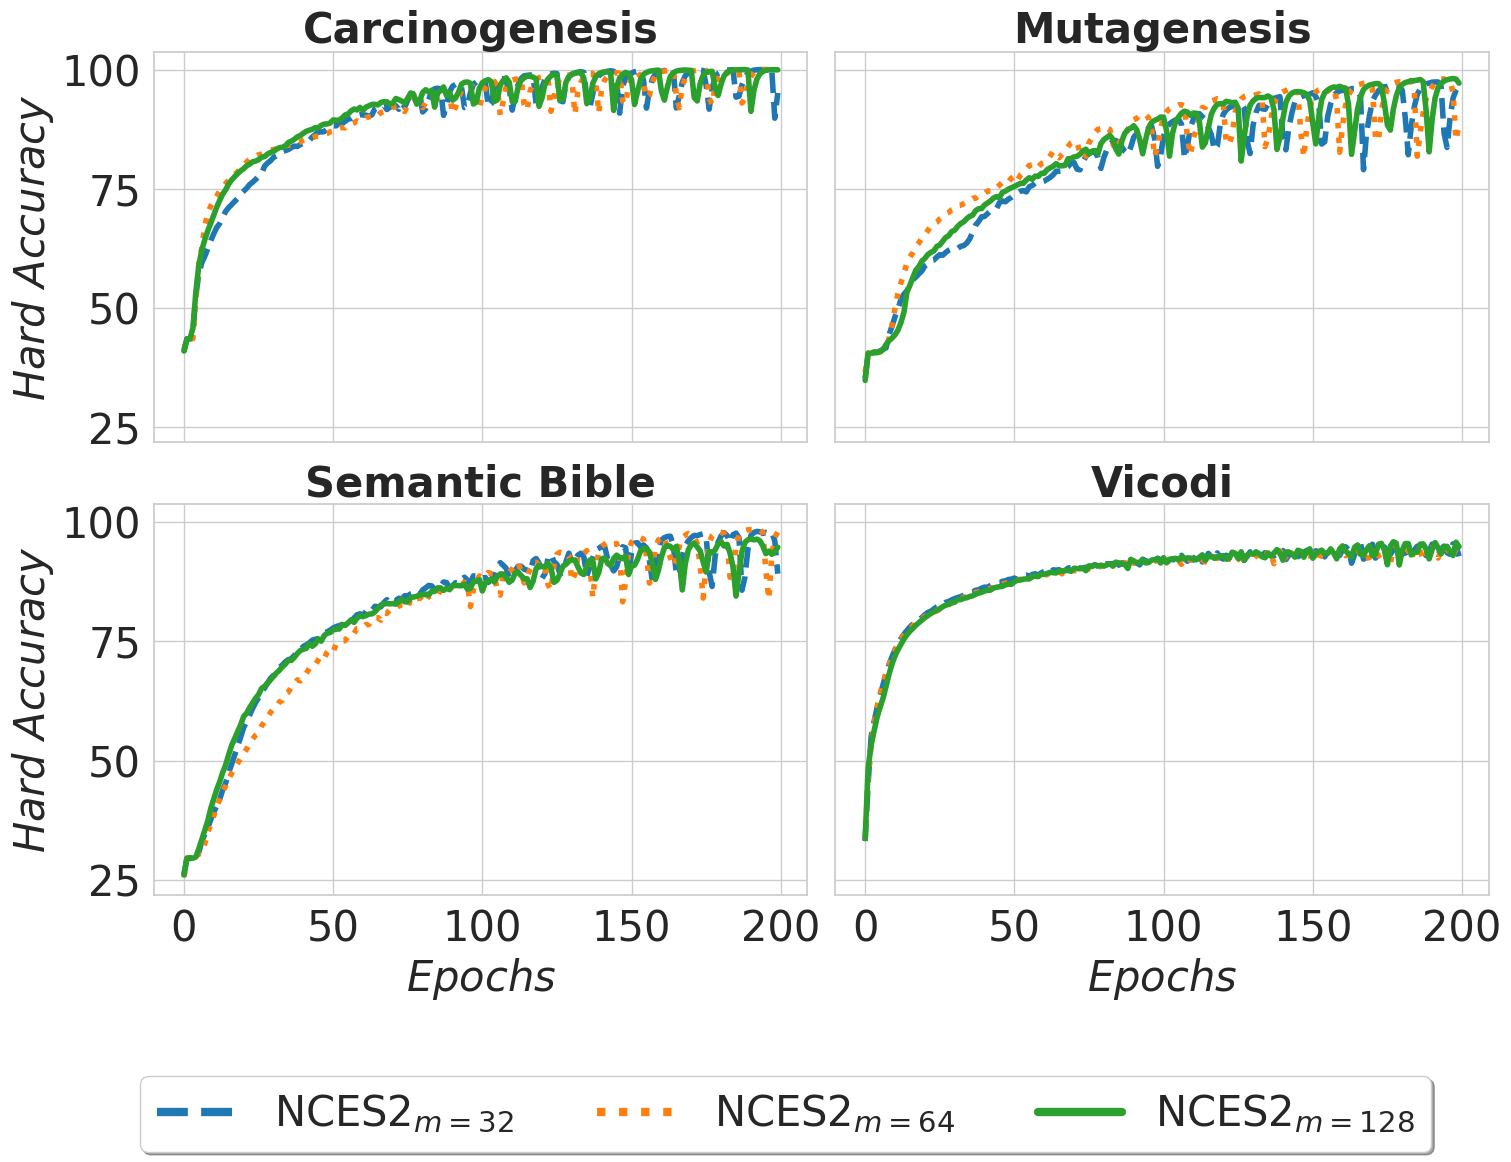

In [26]:
plot_acc_curves(plot_data, names, mode='hard')

In [32]:
def plot_loss_curves(loss_data, names, emb_model='ConEx'):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('NCES2$_{m=32}$', 'NCES2$_{m=64}$', 'NCES2$_{m=128}$')
    for ax, name, data in zip(axs.flat, names, loss_data):
        i = 0
        for crv in data['loss']:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(crv, mk, markersize=5, linewidth=4, color=c)
            i += 1
        ax.set_title(name, fontsize=30, fontweight="bold")
        ax.set_xlabel('$Epochs$', fontsize=30)
        ax.set_ylabel('$Loss$', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=30)

    leg = fig.legend(legend, loc='upper center', prop={'size': 30}, bbox_to_anchor=(0.52, -0.05), fancybox=True, shadow=True, ncol=3)
    for line in leg.get_lines():
        line.set_linewidth(6.0)
    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'loss-curves-nces2.pdf', bbox_inches='tight')
    fig.show()

In [28]:
loss_data = [{'loss': []}, {'loss': []}, {'loss': []}, {'loss': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer_inducing_points32", "SetTransformer_inducing_points64", "SetTransformer_inducing_points128"]:
        with open(f'datasets/{kb}/Plot_data/{emb_model}_{model}.json') as file:
            data = json.load(file)
            loss_data[i]['loss'].append(data['loss'])

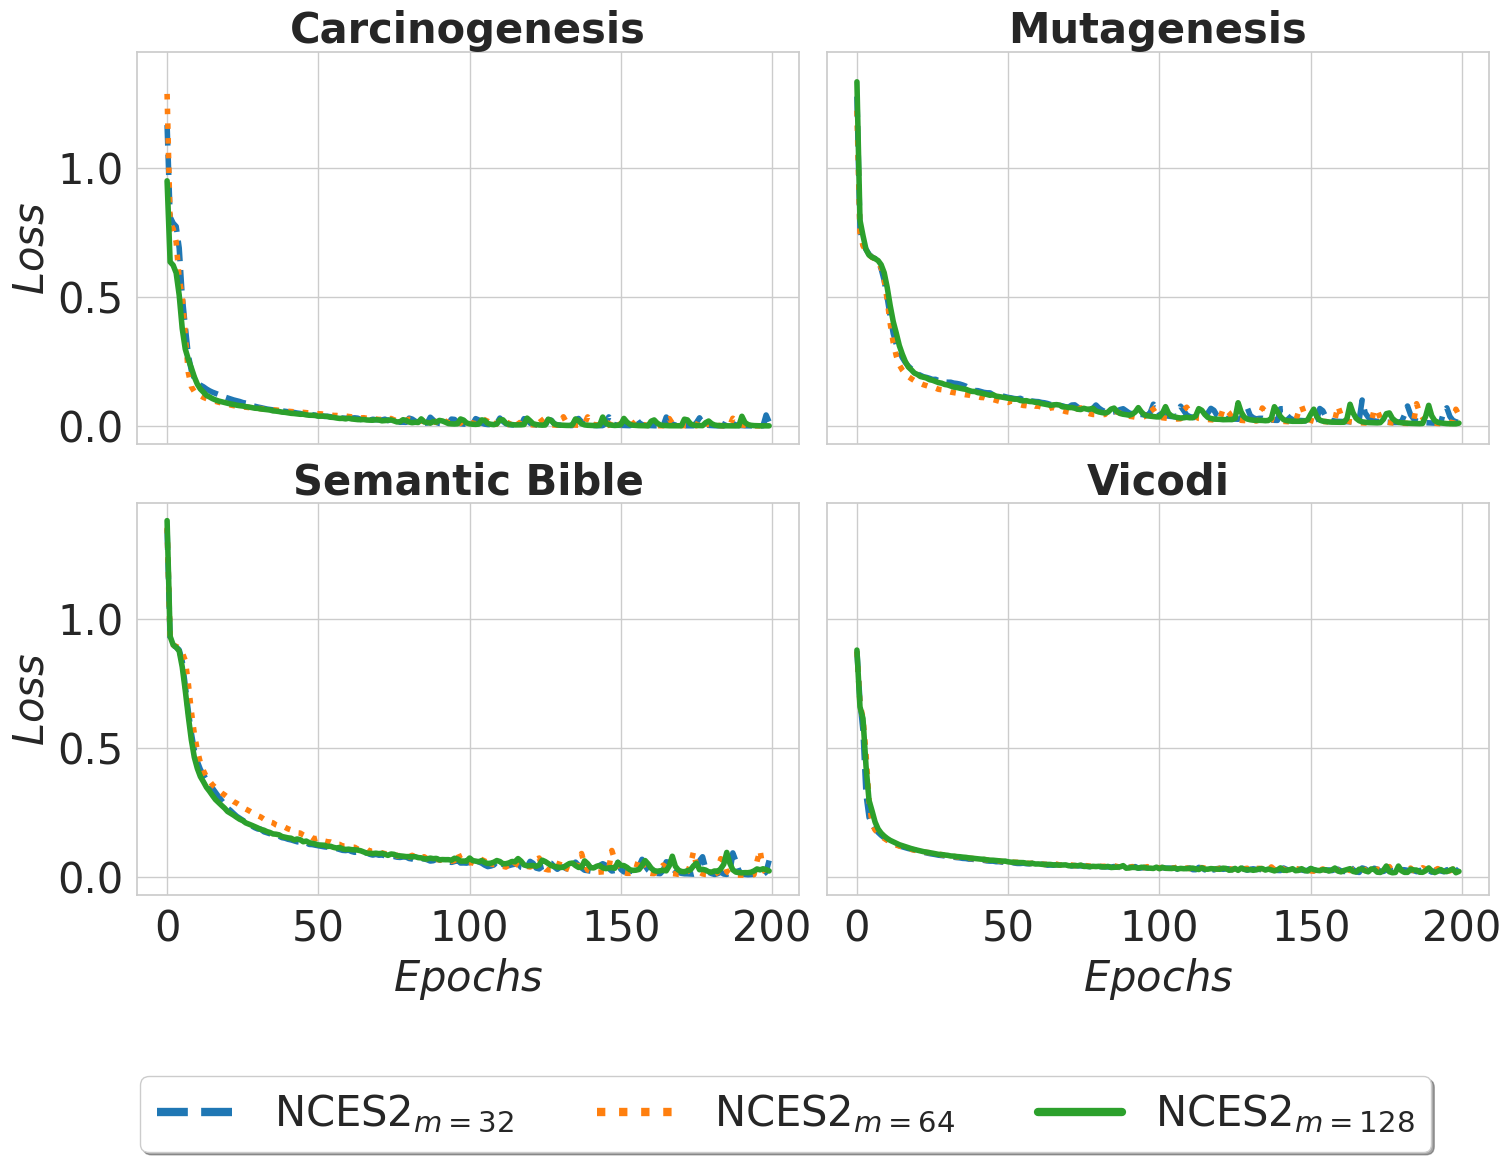

In [33]:
names = ['Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi']
plot_loss_curves(loss_data, names, emb_model='ConEx')